In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Valores de Variables

M = 1*10**31 #Kg
m = 1*10**26 #Kg
R_i = 1.7 * (10**10) # m
v_i = 0.0 # m/s
P_i = 5.6 * (10**4) #N/m^2

G = 6.673 * (10**-11)
gamma = 5.0/3.0

dt = 10.0**4

#Ecuaciones - Metodo de diferencias finitas

primer_termino = (4*np.pi*R_i*R_i*P_i)/m
segundo_termino = (G*M)/(R_i*R_i)

v_f = v_i + (primer_termino - segundo_termino)*dt

R_f = R_i + v_f*dt

P_f = (P_i*R_i**(3*gamma))/(R_f**(3*gamma))


#Metodo Iterativo 

#Almacenamos los datos en las siguentes listas

datos_R = []
datos_v = []
datos_P = []

for i in range(0,150):
    datos_R.append(R_i)
    datos_v.append(v_i)
    datos_P.append(P_i)
    
    primer_termino = (4*np.pi*R_i*R_i*P_i)/m
    segundo_termino = (G*M)/(R_i*R_i)
    
    v_f = v_i + (primer_termino - segundo_termino)*dt
    R_f = R_i + v_f*dt
    P_f = (P_i*R_i**(3*gamma))/(R_f**(3*gamma))
    
    v_i = v_f
    R_i = R_f
    P_i = P_f
    
    
    
#Pasamos a numpy arrays
datos_R = np.array(datos_R)
datos_v = np.array(datos_v)
datos_P = np.array(datos_P)

#Tiempo para graficar
tiempo = np.linspace(dt* (1.0/60.0) * (1.0/60.0) * (1.0/24.0) , dt*150* (1.0/60.0) * (1.0/60.0) * (1.0/24.0) ,150)

Text(0, 0.5, 'Presión [ $10^4$ N/$m^2$]')

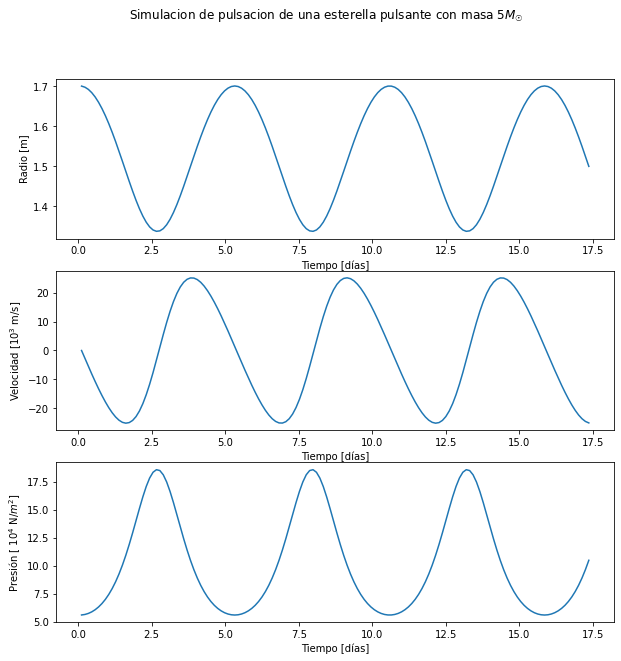

In [5]:
#Graficamos

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,10))
fig.suptitle('Simulacion de pulsacion de una esterella pulsante con masa $5M_☉$')

ax1.plot(tiempo, datos_R/(10.0**10))
ax1.set_ylabel('Radio [m]')
ax1.set_xlabel('Tiempo [días]')

ax2.plot(tiempo, datos_v/10**3)
ax2.set_xlabel('Tiempo [días]')
ax2.set_ylabel('Velocidad [$10^3$ m/s]')

ax3.plot(tiempo, datos_P/10**4)
ax3.set_xlabel('Tiempo [días]')
ax3.set_ylabel('Presión [ $10^4$ N/$m^2$]')

